In [2]:
!wget https://github.com/AutoGIS/data/raw/master/L4_data.zip
!unzip L4_data.zip -d 'L4_data'

Archive:  L4_data.zip
 extracting: L4_data/Amazon_river.cpg  
  inflating: L4_data/Amazon_river.dbf  
  inflating: L4_data/Amazon_river.prj  
  inflating: L4_data/Amazon_river.shp  
  inflating: L4_data/Amazon_river.shx  
 extracting: L4_data/Helsinki_borders.cpg  
  inflating: L4_data/Helsinki_borders.dbf  
  inflating: L4_data/Helsinki_borders.prj  
  inflating: L4_data/Helsinki_borders.shp  
  inflating: L4_data/Helsinki_borders.shx  
 extracting: L4_data/TravelTimes_to_5975375_RailwayStation.cpg  
  inflating: L4_data/TravelTimes_to_5975375_RailwayStation.dbf  
  inflating: L4_data/TravelTimes_to_5975375_RailwayStation.prj  
  inflating: L4_data/TravelTimes_to_5975375_RailwayStation.shp  
  inflating: L4_data/TravelTimes_to_5975375_RailwayStation.shx  


In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.speedups

In [5]:
boder_fp = 'L4_data/Helsinki_borders.shp'
grid_fp = 'L4_data/TravelTimes_to_5975375_RailwayStation.shp'

border = gpd.read_file(boder_fp)
grid = gpd.read_file(grid_fp)

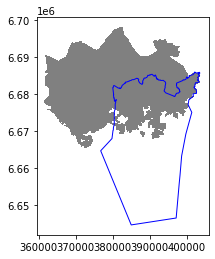

In [8]:
ax = grid.plot(facecolor='gray')
border.plot(ax=ax, facecolor='None', edgecolor='blue')

In [10]:
assert grid.crs == border.crs, "CRS differs between layers!"

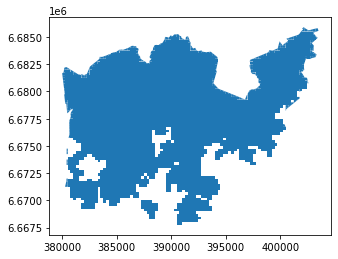

In [16]:
intersection = gpd.overlay(grid, border, how='intersection')
intersection.plot()

In [17]:
intersection.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE,geometry
0,29476,41,29483,46,5876274,29990,76,95,24984,77,99,5975375,25532,365,27517366,Helsinki,Helsingfors,091,"POLYGON ((402250.000 6685750.000, 402024.224 6..."
1,29456,41,29462,46,5876275,29866,74,95,24860,75,93,5975375,25408,363,27517366,Helsinki,Helsingfors,091,"POLYGON ((402367.890 6685750.000, 402250.000 6..."
2,36772,50,36778,56,5876278,33541,116,137,44265,130,146,5975375,31110,444,27517366,Helsinki,Helsingfors,091,"POLYGON ((403250.000 6685750.000, 403148.515 6..."
3,36898,49,36904,56,5876279,33720,119,141,44444,132,155,5975375,31289,447,27517366,Helsinki,Helsingfors,091,"POLYGON ((403456.484 6685750.000, 403250.000 6..."
4,29411,40,29418,44,5878128,29944,75,95,24938,76,99,5975375,25486,364,27517366,Helsinki,Helsingfors,091,"POLYGON ((402000.000 6685500.000, 401900.425 6..."


In [18]:
out_fp = 'L4_data/TravelTimes_to_5975375_RailwayStation_Helsinki.geojson'

intersection.to_file(out_fp, driver='GeoJSON')

# Aggregating data

In [25]:
dissolved = intersection.dissolve(by='car_r_t')
dissolved.head()

,geometry,car_m_d,car_m_t,car_r_d,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE
car_r_t,,,,,,,,,,,,,,,,,,
-1,"MULTIPOLYGON (((388000.000 6668750.000, 387750...",-1,-1,-1,5913094,-1,-1,-1,-1,-1,-1,-1,-1,-1,27517366,Helsinki,Helsingfors,091
0,"POLYGON ((386000.000 6672000.000, 385750.000 6...",0,0,0,5975375,0,0,0,0,0,0,5975375,0,0,27517366,Helsinki,Helsingfors,091
7,"POLYGON ((386250.000 6671750.000, 386000.000 6...",1051,7,1051,5973739,617,5,6,617,5,6,5975375,448,6,27517366,Helsinki,Helsingfors,091
8,"MULTIPOLYGON (((386250.000 6671500.000, 386000...",1286,8,1286,5973736,706,10,10,706,10,10,5975375,706,10,27517366,Helsinki,Helsingfors,091
9,"MULTIPOLYGON (((386500.000 6671250.000, 386250...",1871,9,1871,5970457,1384,11,13,1394,11,12,5975375,1249,18,27517366,Helsinki,Helsingfors,091


In [26]:
print('Rows in original intersection GeoDataFrame:', len(intersection))
print('Rows in dissolved layer:', len(dissolved))

Rows in original intersection GeoDataFrame: 3826
Rows in dissolved layer: 51


In [32]:
dissolved.iloc[15]

geometry    (POLYGON ((388250.0001354316 6668750.000042891...
car_m_d                                                 12035
car_m_t                                                    18
car_r_d                                                 11997
from_id                                               5903886
pt_m_d                                                  11568
pt_m_t                                                     30
pt_m_tt                                                    36
pt_r_d                                                  11568
pt_r_t                                                     34
pt_r_tt                                                    37
to_id                                                 5975375
walk_d                                                  11638
walk_t                                                    166
GML_ID                                               27517366
NAMEFIN                                              Helsinki
NAMESWE 

In [34]:
selection = gpd.GeoDataFrame([dissolved.iloc[15]], crs=dissolved.crs)

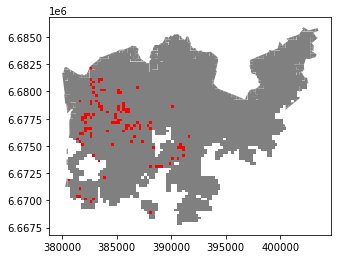

In [35]:
ax = dissolved.plot(facecolor='gray')
selection.plot(ax=ax, facecolor='red')

# Simplifying geometries

In [36]:
fp = 'L4_data/Amazon_river.shp'
data = gpd.read_file(fp)

In [37]:
data.crs

<Projected CRS: PROJCS["Mercator_2SP",GEOGCS["GCS_GRS 1980(IUGG, 1 ...>
Name: Mercator_2SP
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Mercator (variant B)
Datum: D_unknown
- Ellipsoid: GRS80
- Prime Meridian: Unknown

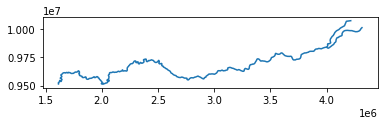

In [38]:
data.plot();

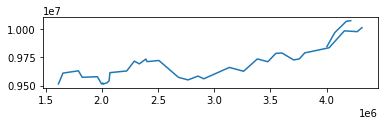

In [40]:
data['geom_gen'] = data.simplify(tolerance=20000)

# Set geometry to be our new simlified geometry
data = data.set_geometry('geom_gen')

data.plot();